<a href="https://colab.research.google.com/github/qiao-hao-git/Deep-Learning-Experiment/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

In [29]:
transforms = transforms.Compose([
    # transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_data = torchvision.datasets.MNIST('./dataset',train=True,download=True,transform=transforms)
test_data = torchvision.datasets.MNIST('./dataset',train=False,download=True,transform=transforms)

In [30]:
print(train_data[0][0].size())
print(test_data[0][0].size())

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


In [31]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)

In [32]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

In [33]:
from torch.nn.modules.conv import Conv2d
from torch.nn.modules.dropout import Dropout
class Lenet(nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(1, 32, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(32),

        nn.Conv2d(32, 32, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(32),

        nn.Dropout(0.4)
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(64),

        nn.Conv2d(64, 64, 3, 1, 1),
        nn.ReLU(),
        nn.BatchNorm2d(64),

        nn.Conv2d(64, 64, 5, 2, 1),
        nn.ReLU(),
        nn.BatchNorm2d(64),

        nn.Dropout(0.4)
    )
    self.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*13*13, 128),
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Dropout(0.4),
        nn.Linear(128, 10)
    )
  def forward(self, x):
    y = self.conv1(x)
    y = self.conv2(y)
    y = self.fc(y)
    return y

In [34]:
def test(model, dataloader):
  model.eval()
  num_correct, num_samples = 0, 0
  with torch.no_grad():
    for image, label in dataloader:
      if torch.cuda.is_available():
        image = image.cuda()
        label = label.cuda()
      pred = model(image)
      _, predictions = pred.max(1)
      num_correct += (predictions==label).sum()
      num_samples += label.size(0)

    accuracy = float(num_correct/num_samples)
    print('Accuracy = '+ str(accuracy*100) + '%')
  return accuracy

In [35]:
lr, wd, lr_period, lr_decay, epochs = 1e-4, 1e-4, 10, 0.9, 20
model = Lenet()
if torch.cuda.is_available():
  model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, lr_period, lr_decay)
loss_fn = nn.CrossEntropyLoss()

In [36]:
train_loss = []
test_acc = []

for epoch in range(epochs):
  running_loss = 0.0
  model.train()
  for image, label in tqdm(train_loader, total=len(train_loader)):
    if torch.cuda.is_available():
      image = image.cuda()
      label = label.cuda()
    output = model(image)
    loss = loss_fn(output, label)
    running_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  scheduler.step()
  train_acc = test(model, train_loader)
  test_accuracy = test(model, test_loader)
  if epoch % 5 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}] - Loss: {running_loss:.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_accuracy:.4f}')
  train_loss.append(running_loss)
  test_acc.append(test_accuracy)

100%|██████████| 3750/3750 [00:30<00:00, 122.57it/s]


Accuracy = 98.7166702747345%
Accuracy = 98.76999855041504%
Epoch [1/20] - Loss: 784.8172 - Train Acc: 0.9872 - Test Acc: 0.9877


100%|██████████| 3750/3750 [00:30<00:00, 123.64it/s]


Accuracy = 99.13833737373352%
Accuracy = 99.05999898910522%


100%|██████████| 3750/3750 [00:30<00:00, 122.21it/s]


Accuracy = 99.4016706943512%
Accuracy = 99.23999905586243%


100%|██████████| 3750/3750 [00:31<00:00, 120.81it/s]


Accuracy = 99.46333169937134%
Accuracy = 99.17999505996704%


100%|██████████| 3750/3750 [00:30<00:00, 123.31it/s]


Accuracy = 99.57000017166138%
Accuracy = 99.36999678611755%


100%|██████████| 3750/3750 [00:30<00:00, 124.77it/s]


Accuracy = 99.63833689689636%
Accuracy = 99.39000010490417%
Epoch [6/20] - Loss: 126.2533 - Train Acc: 0.9964 - Test Acc: 0.9939


100%|██████████| 3750/3750 [00:30<00:00, 122.47it/s]


Accuracy = 99.6916651725769%
Accuracy = 99.34999942779541%


100%|██████████| 3750/3750 [00:30<00:00, 122.30it/s]


Accuracy = 99.75500106811523%
Accuracy = 99.32999610900879%


100%|██████████| 3750/3750 [00:30<00:00, 123.30it/s]


Accuracy = 99.79833364486694%
Accuracy = 99.43999648094177%


100%|██████████| 3750/3750 [00:31<00:00, 119.02it/s]


Accuracy = 99.83833432197571%
Accuracy = 99.41999912261963%


100%|██████████| 3750/3750 [00:30<00:00, 124.19it/s]


Accuracy = 99.8716652393341%
Accuracy = 99.4599997997284%
Epoch [11/20] - Loss: 80.9315 - Train Acc: 0.9987 - Test Acc: 0.9946


100%|██████████| 3750/3750 [00:30<00:00, 123.95it/s]


Accuracy = 99.82166886329651%
Accuracy = 99.57000017166138%


100%|██████████| 3750/3750 [00:30<00:00, 123.96it/s]


Accuracy = 99.88999962806702%
Accuracy = 99.40999746322632%


100%|██████████| 3750/3750 [00:30<00:00, 122.71it/s]


Accuracy = 99.8716652393341%
Accuracy = 99.53999519348145%


100%|██████████| 3750/3750 [00:30<00:00, 121.56it/s]


Accuracy = 99.88666772842407%
Accuracy = 99.46999549865723%


100%|██████████| 3750/3750 [00:30<00:00, 121.50it/s]


Accuracy = 99.91333484649658%
Accuracy = 99.47999715805054%
Epoch [16/20] - Loss: 62.1268 - Train Acc: 0.9991 - Test Acc: 0.9948


100%|██████████| 3750/3750 [00:30<00:00, 124.98it/s]


Accuracy = 99.92333650588989%
Accuracy = 99.44999814033508%


100%|██████████| 3750/3750 [00:30<00:00, 124.39it/s]


Accuracy = 99.91333484649658%
Accuracy = 99.42999482154846%


100%|██████████| 3750/3750 [00:30<00:00, 124.62it/s]


Accuracy = 99.94000196456909%
Accuracy = 99.43999648094177%


100%|██████████| 3750/3750 [00:30<00:00, 123.64it/s]


Accuracy = 99.94333386421204%
Accuracy = 99.46999549865723%


In [37]:
import numpy as np
def plot_curve(y, title, xlabel, ylabel):
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Loss')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    fig.tight_layout()
    plt.show()

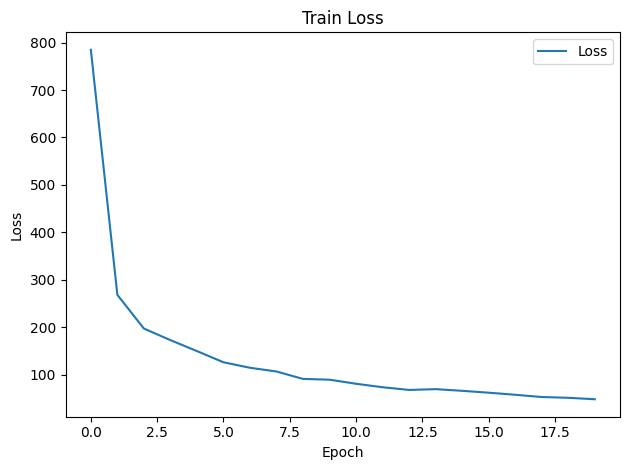

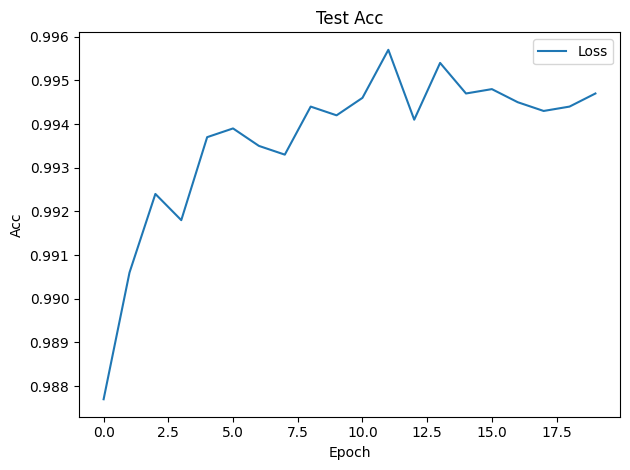

In [38]:
plot_curve(train_loss, 'Train Loss', 'Epoch', 'Loss')
plot_curve(test_acc, 'Test Acc', 'Epoch', 'Acc')